
Quantile Regression Work for Stats Class

### Required Import

In [844]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("husl", 10)
import missingno as msno

from scipy import stats
from scipy.stats import skew
from scipy.special import boxcox1p

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import DataConversionWarning
import lightgbm as lgb
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

import seaborn as sns
sns.set_theme(style="ticks")


### Read Train Data

In [846]:
housing_data = pd.read_csv('housing_data.csv')

In [847]:
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [848]:
# Continuous Features
# LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF,
# 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, PoolArea, MiscVal, MoSold, YrSold

# Discrete features 
# BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd,
# Fireplaces, GarageCars, ScreenPorch

# year feature
# YearBuilt, YearRemodAdd, GarageYrBlt, YrSold, MoSold

# Remove Features
# Id

# Categorical Features
# MSSubClass, OverallQual, OverallCond, Street , Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood,
# Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, 
# ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, 
# CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, 
# PoolQC, Fence, MiscFeature, SaleType, SaleCondition

# target variable
# SalePrice

### Column Data Type Specific Analysis

In [849]:
col_desc_dict = {col: desc for col, desc in [col_desc.strip().split(': ') for col_desc in """MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
BedroomAbvGr: Number of bedrooms above basement level
KitchenAbvGr: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
""".split('\n')  if col_desc.strip()!='']}

#### Continuous features

In [850]:
continous_features = 'LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal'.split(', ')

In [851]:
continous_missing_count = housing_data[continous_features].isnull().sum()
continuous_df_cols = [(col, col_desc_dict[col], continous_missing_count[col]) for col in continous_features]

In [852]:
coninuous_df = pd.DataFrame(continuous_df_cols, columns=['Column Name', 'Description', 'MCtr']).sort_values(by='MCtr', ascending=False)
display(coninuous_df)

,Column Name,Description,MCtr
0,LotFrontage,Linear feet of street connected to property,259
2,MasVnrArea,Masonry veneer area in square feet,8
10,GrLivArea,Above grade (ground) living area square feet,0
17,PoolArea,Pool area in square feet,0
16,ScreenPorch,Screen porch area in square feet,0
15,3SsnPorch,Three season porch area in square feet,0
14,EnclosedPorch,Enclosed porch area in square feet,0
13,OpenPorchSF,Open porch area in square feet,0
12,WoodDeckSF,Wood deck area in square feet,0
11,GarageArea,Size of garage in square feet,0


In [853]:
print(f'Length of Continuous features: {len(continous_features)}')

Length of Continuous features: 19


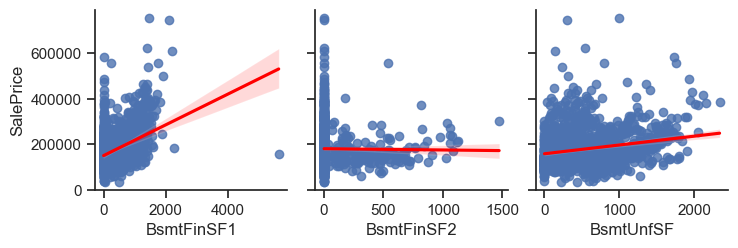

In [854]:
pp = sns.pairplot(data=housing_data,
                  y_vars=['SalePrice'],
                  x_vars=continous_features[3:6],
                  kind='reg',plot_kws={'line_kws':{'color':'red'}},
                  )

In [855]:
# Handling missing values
for col in ['LotFrontage', 'MasVnrArea']:
    housing_data[col] = housing_data.groupby("Neighborhood")[col]\
                             .transform(lambda x: x.fillna(x.median()))

#### discrete features

In [856]:
discrete_features = 'BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageCars'.split(', ')

In [857]:
discrete_missing_count = housing_data[discrete_features].isnull().sum()
discrete_df_cols = [(col, col_desc_dict[col], discrete_missing_count[col]) for col in discrete_features]
discrete_df = pd.DataFrame(discrete_df_cols, columns=['Column Name', 'Description', 'MCtr']).sort_values(by='MCtr', ascending=False)
display(discrete_df)

,Column Name,Description,MCtr
0,BsmtFullBath,Basement full bathrooms,0
1,BsmtHalfBath,Basement half bathrooms,0
2,FullBath,Full bathrooms above grade,0
3,HalfBath,Half baths above grade,0
4,BedroomAbvGr,Number of bedrooms above basement level,0
5,KitchenAbvGr,Number of kitchens,0
6,TotRmsAbvGrd,Total rooms above grade (does not include bath...,0
7,Fireplaces,Number of fireplaces,0
8,GarageCars,Size of garage in car capacity,0


In [858]:
discrete_df['Description'] = discrete_df['Description'].apply(lambda x: x[:40])

In [859]:
display(discrete_df)

,Column Name,Description,MCtr
0,BsmtFullBath,Basement full bathrooms,0
1,BsmtHalfBath,Basement half bathrooms,0
2,FullBath,Full bathrooms above grade,0
3,HalfBath,Half baths above grade,0
4,BedroomAbvGr,Number of bedrooms above basement level,0
5,KitchenAbvGr,Number of kitchens,0
6,TotRmsAbvGrd,Total rooms above grade (does not includ,0
7,Fireplaces,Number of fireplaces,0
8,GarageCars,Size of garage in car capacity,0


In [860]:
print(f'Length of Discrete features: {len(discrete_features)}')

Length of Discrete features: 9


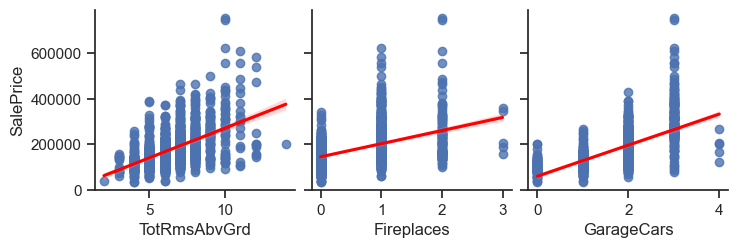

In [861]:
pp = sns.pairplot(data=housing_data,
                  y_vars=['SalePrice'],
                  x_vars=discrete_features[6:],
                  kind='reg',plot_kws={'line_kws':{'color':'red'}},
                  )

#### year features

In [862]:
year_features = 'YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold'.split(', ')

In [863]:
year_missing_count = housing_data[year_features].isnull().sum()
year_df_cols = [(col, col_desc_dict[col], year_missing_count[col]) for col in year_features]
year_df = pd.DataFrame(year_df_cols, columns=['Column Name', 'Description', 'MCtr']).sort_values(by='MCtr', ascending=False)
display(year_df)

,Column Name,Description,MCtr
2,GarageYrBlt,Year garage was built,81
0,YearBuilt,Original construction date,0
1,YearRemodAdd,Remodel date,0
3,MoSold,Month Sold,0
4,YrSold,Year Sold,0


In [864]:
print(f'Length of Year features: {len(year_features)}')

Length of Year features: 5


In [865]:
# Handling missing values
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(housing_data['YearBuilt'])

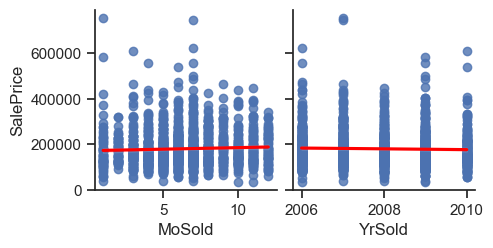

In [866]:
pp = sns.pairplot(data=housing_data,
                  y_vars=['SalePrice'],
                  x_vars=year_features[3:],
                  kind='reg',plot_kws={'line_kws':{'color':'red'}},
                  )

#### Cat Features

In [867]:
cat_features = '''MSSubClass, MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition'''.split(', ')

In [868]:
cat_missing_count = housing_data[cat_features].isnull().sum()
cat_df_cols = [(col, col_desc_dict[col], cat_missing_count[col]) for col in cat_features]
cat_df = pd.DataFrame(cat_df_cols, columns=['Column Name', 'Description', 'MCtr']).sort_values(by='MCtr', ascending=False)
display(cat_df)

,Column Name,Description,MCtr
41,PoolQC,Pool quality,1453
43,MiscFeature,Miscellaneous feature not covered in other cat...,1406
3,Alley,Type of alley access,1369
42,Fence,Fence quality,1179
35,FireplaceQu,Fireplace quality,690
39,GarageCond,Garage condition,81
38,GarageQual,Garage quality,81
37,GarageFinish,Interior finish of the garage,81
36,GarageType,Garage location,81
28,BsmtFinType2,Quality of second finished area (if present),38


In [869]:
print(f'Length of Categorical features: {len(cat_features)}')

Length of Categorical features: 46


In [870]:
missing_cat_feats = cat_df[cat_df['MCtr']>0]['Column Name'].values
for col in missing_cat_feats:
    housing_data[col] = housing_data[col].fillna('None')
print(missing_cat_feats)

['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'GarageCond'
 'GarageQual' 'GarageFinish' 'GarageType' 'BsmtFinType2' 'BsmtExposure'
 'BsmtFinType1' 'BsmtCond' 'BsmtQual' 'MasVnrType' 'Electrical']


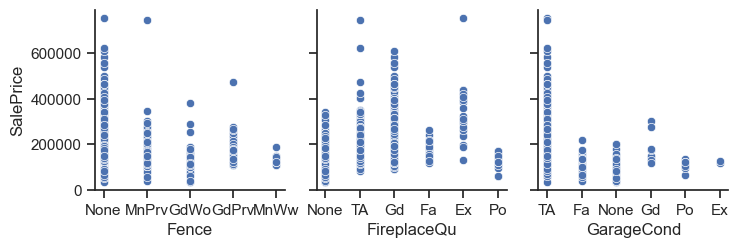

In [871]:
pp = sns.pairplot(data=housing_data,
                  y_vars=['SalePrice'],
                  x_vars=missing_cat_feats[3:6]
                  )

In [872]:
len(cat_features) + len(discrete_features) + len(continous_features) + len(year_features) + len(['Id', 'SalePrice']) == len(housing_data.columns) 

True

In [873]:
housing_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

### Target Distribution SalePrice

In [874]:
def fetch_q_target_plt(df, col='SalePrice', quantiles=[0.1, 0.5, 0.9], colors=['r', 'b', 'g']):
    data = df[col] if col is not None else df
    ax = sns.histplot(data, kde=True)
    xytext = [30, 50, 30]
    for idx, (quantile_, c) in enumerate(zip(quantiles, colors)):
        x = np.quantile(data.tolist(), quantile_)
        line = ax.axvline(x, color=c, linestyle='--', label=f'{quantile_*100:.0f}th Percentile')          
        ax.annotate(f'{x:.2f}',                 
                    xy=(x,0), xytext=(0,xytext[idx]), color=line.get_color(),                 
                    xycoords = ax.get_xaxis_transform(), textcoords="offset points",
                    size=12, ha="center")

        ax.title.set_text('SalePrice Distribution')
    # al = ax.legend(['90th Percentile', '50th Percentile', '10th Percentile'], labelcolor=['r', 'b', 'g'])
    # al.set_title('Quantiles', prop={'size':12})
    ax.legend()
    
    plt.show()

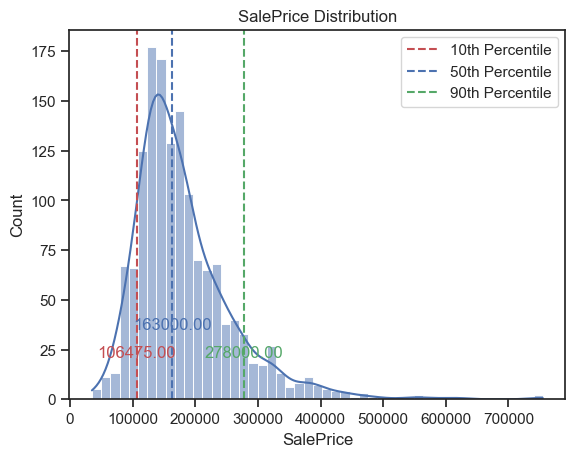

In [875]:
fetch_q_target_plt(housing_data)


### Correlation

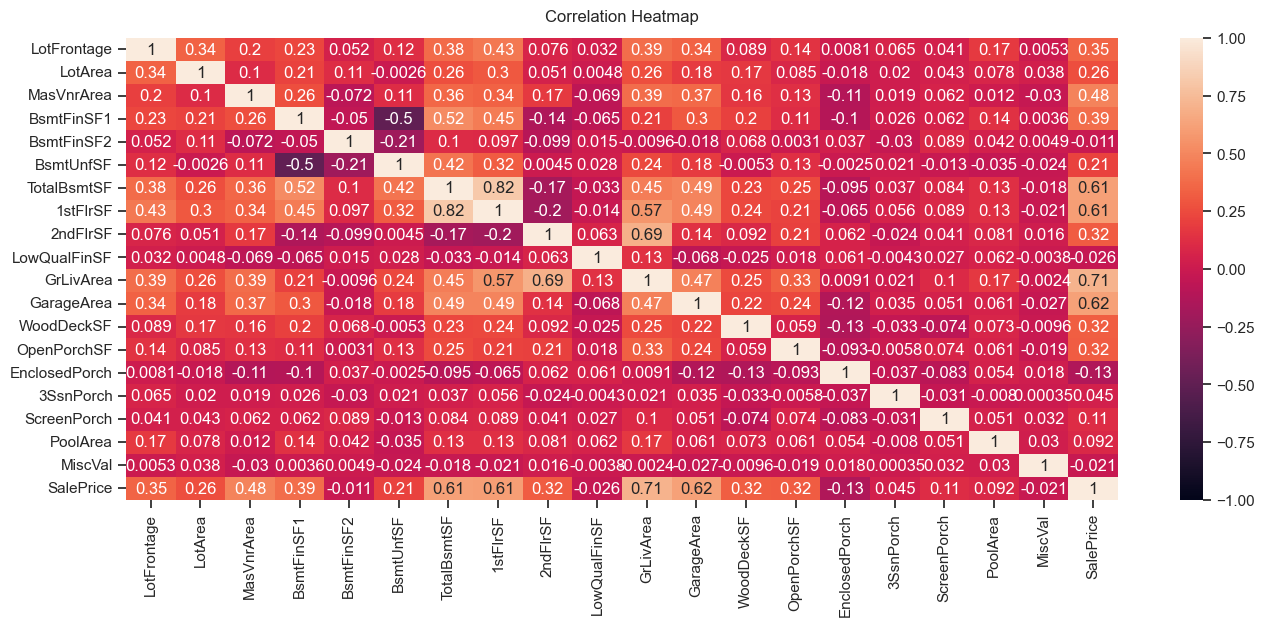

In [876]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(housing_data[continous_features+['SalePrice']].corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Data Transformation

In [877]:
housing_data['MSSubClass'] = housing_data['MSSubClass'].apply(str)
housing_data['OverallCond'] = housing_data['OverallCond'].astype(str)
housing_data['YrSold'] = housing_data['YrSold'].astype(str)
housing_data['MoSold'] = housing_data['MoSold'].astype(str)

In [878]:
import joblib
from sklearn.preprocessing import LabelEncoder
import os


In [879]:
out_dir = "out_dir"
os.makedirs(out_dir, exist_ok=True)

In [880]:
dummy_cols = cat_features + ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']

In [881]:
for col in dummy_cols:
    le = LabelEncoder()
    housing_data[col] = le.fit_transform(housing_data[[col]])
    joblib.dump(le, f'{out_dir}/{col}_label_encoder.pkl')

In [882]:
housing_data_dummies = pd.get_dummies(housing_data, columns=dummy_cols)
housing_data_dummies.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSSubClass_14,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LotShape_3,LandContour_0,LandContour_1,LandContour_2,LandContour_3,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_0,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,OverallQual_0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_0,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_5,KitchenQual_0,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,PoolQC_3,Fence_0,Fence_1

In [883]:
from sklearn.preprocessing import MinMaxScaler

In [884]:
scalar_cols = [col for col in continous_features+year_features+discrete_features if col not in dummy_cols]

In [885]:
housing_data_dummies[scalar_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars
0,65.000,8450,196.000,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,2003,2003,2003.000,1,0,2,1,3,1,8,0,2
1,80.000,9600,0.000,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,1976,1976,1976.000,0,1,2,0,3,1,6,1,2
2,68.000,11250,162.000,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,2001,2002,2001.000,1,0,2,1,3,1,6,1,2
3,60.000,9550,0.000,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,1915,1970,1998.000,1,0,1,0,3,1,7,1,3
4,84.000,14260,350.000,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,2000,2000,2000.000,1,0,2,1,4,1,9,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.000,7917,0.000,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,1999,2000,1999.000,0,0,2,1,3,1,7,1,2
1456,85.000,13175,119.000,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,1978,1988,1978.000,1,0,2,0,3,1,7,2,2
1457,66.000,9042,0.000,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,1941,2006,1941.000,0,0,2,0,4,1,9,2,1
1458,68.000,9717,0.000,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,1950,1996,1950.000,1,0,1,0,2,1,5,0,1


In [886]:
scaler = MinMaxScaler()
housing_data_dummies[scalar_cols] = scaler.fit_transform(housing_data_dummies[scalar_cols].values)

In [887]:
joblib.dump(scaler, f'{out_dir}/scalar.pkl')

['out_dir/scalar.pkl']

In [888]:
scaler_target = MinMaxScaler()
housing_data_dummies['SalePrice'] = scaler_target.fit_transform(housing_data_dummies['SalePrice'].values.reshape(-1, 1))
joblib.dump(scaler, f'{out_dir}/scalar_target.pkl')

['out_dir/scalar_target.pkl']

In [889]:
housing_data_dummies

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_0,MSSubClass_1,MSSubClass_2,MSSubClass_3,MSSubClass_4,MSSubClass_5,MSSubClass_6,MSSubClass_7,MSSubClass_8,MSSubClass_9,MSSubClass_10,MSSubClass_11,MSSubClass_12,MSSubClass_13,MSSubClass_14,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,Street_1,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_2,LotShape_3,LandContour_0,LandContour_1,LandContour_2,LandContour_3,Utilities_0,Utilities_1,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_3,LotConfig_4,LandSlope_0,LandSlope_1,LandSlope_2,Neighborhood_0,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Neighborhood_24,Condition1_0,Condition1_1,Condition1_2,Condition1_3,Condition1_4,Condition1_5,Condition1_6,Condition1_7,Condition1_8,Condition2_0,Condition2_1,Condition2_2,Condition2_3,Condition2_4,Condition2_5,Condition2_6,Condition2_7,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_1,HouseStyle_2,HouseStyle_3,HouseStyle_4,HouseStyle_5,HouseStyle_6,HouseStyle_7,OverallQual_0,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_0,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_0,RoofStyle_1,RoofStyle_2,RoofStyle_3,RoofStyle_4,RoofStyle_5,RoofMatl_0,RoofMatl_1,RoofMatl_2,RoofMatl_3,RoofMatl_4,RoofMatl_5,RoofMatl_6,RoofMatl_7,Exterior1st_0,Exterior1st_1,Exterior1st_2,Exterior1st_3,Exterior1st_4,Exterior1st_5,Exterior1st_6,Exterior1st_7,Exterior1st_8,Exterior1st_9,Exterior1st_10,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_0,Exterior2nd_1,Exterior2nd_2,Exterior2nd_3,Exterior2nd_4,Exterior2nd_5,Exterior2nd_6,Exterior2nd_7,Exterior2nd_8,Exterior2nd_9,Exterior2nd_10,Exterior2nd_11,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_0,ExterQual_1,ExterQual_2,ExterQual_3,ExterCond_0,ExterCond_1,ExterCond_2,ExterCond_3,ExterCond_4,Foundation_0,Foundation_1,Foundation_2,Foundation_3,Foundation_4,Foundation_5,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_3,BsmtCond_4,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_2,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_0,Heating_1,Heating_2,Heating_3,Heating_4,Heating_5,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_3,HeatingQC_4,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_2,Electrical_3,Electrical_4,Electrical_5,KitchenQual_0,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_0,Functional_1,Functional_2,Functional_3,Functional_4,Functional_5,Functional_6,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_0,GarageType_1,GarageType_2,GarageType_3,GarageType_4,GarageType_5,GarageType_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_0,GarageQual_1,GarageQual_2,GarageQual_3,GarageQual_4,GarageQual_5,GarageCond_0,GarageCond_1,GarageCond_2,GarageCond_3,GarageCond_4,GarageCond_5,PavedDrive_0,PavedDrive_1,PavedDrive_2,PoolQC_0,PoolQC_1,PoolQC_2,PoolQC_3,Fence_0,Fence_1

In [890]:

if 'Id' in housing_data_dummies.columns: housing_data_dummies.drop('Id', axis=1, inplace=True)

### Feature Selection

#### Basic Methods - Remove Constant

In [891]:
# Basic Methods - remove constant and quasi-constant features.
# remove constant features
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0) # default, it removes all zero-variance features, i.e., features that have the same value in all samples
sel.fit(housing_data_dummies)

VarianceThreshold(threshold=0)

In [892]:
housing_data_dummies.shape

(1460, 374)

In [893]:
sum(sel.get_support())

374

#### Basic Methods - Remove quasi-constant features

In [894]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately

sel.fit(housing_data_dummies)
print(sum(sel.get_support()))

262


In [895]:
# finally we can print the quasi-constant features
print(
    len([
        x for x in housing_data_dummies.columns
        if x not in housing_data_dummies.columns[sel.get_support()]
    ]))

all_quasi_const_feat = [x for x in housing_data_dummies.columns if x not in housing_data_dummies.columns[sel.get_support()]]

112


In [896]:
all_quasi_const_feat[:5]

['LotFrontage', 'LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF']

<Axes: >

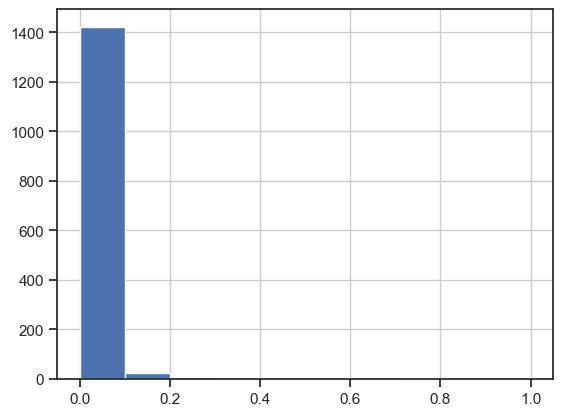

In [897]:
housing_data_dummies['LotArea'].hist()

<Axes: >

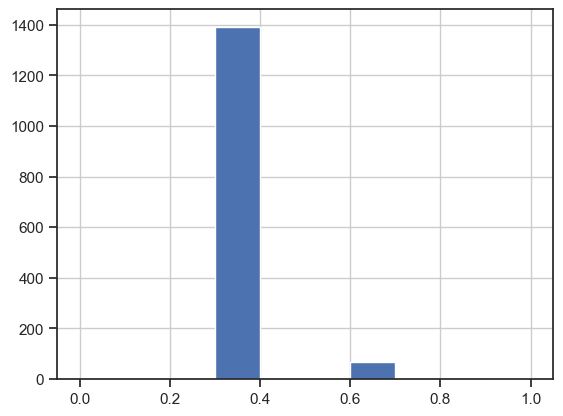

In [898]:
housing_data_dummies['KitchenAbvGr'].hist()

#### Correlation Matrix with Heatmap

In [899]:
corr_matrix = housing_data_dummies[[col for col in housing_data_dummies.columns if col not in all_quasi_const_feat]].corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper    

,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,MSSubClass_0,MSSubClass_0,MSSubClass_1,MSSubClass_1,MSSubClass_3,MSSubClass_3,MSSubClass_4,MSSubClass_4,MSSubClass_5,MSSubClass_5,MSSubClass_8,MSSubClass_8,MSSubClass_9,MSSubClass_9,MSSubClass_10,MSSubClass_10,MSSubClass_11,MSSubClass_11,MSSubClass_12,MSSubClass_12,MSSubClass_13,MSSubClass_13,MSSubClass_14,MSSubClass_14,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Alley_0,Alley_1,Alley_2,LotShape_0,LotShape_1,LotShape_3,LandContour_0,LandContour_1,LandContour_2,LandContour_3,LotConfig_0,LotConfig_1,LotConfig_2,LotConfig_4,LandSlope_0,LandSlope_1,Neighborhood_0,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_14,Neighborhood_15,Neighborhood_16,Neighborhood_17,Neighborhood_18,Neighborhood_19,Neighborhood_20,Neighborhood_21,Neighborhood_22,Neighborhood_23,Condition1_0,Condition1_1,Condition1_2,Condition1_4,Condition1_6,Condition2_2,BldgType_0,BldgType_1,BldgType_2,BldgType_3,BldgType_4,HouseStyle_0,HouseStyle_2,HouseStyle_5,HouseStyle_6,HouseStyle_7,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_2,OverallCond_2,OverallCond_3,OverallCond_3,OverallCond_4,OverallCond_4,OverallCond_5,OverallCond_5,OverallCond_6,OverallCond_6,OverallCond_7,OverallCond_7,OverallCond_8,OverallCond_8,RoofStyle_1,RoofStyle_3,RoofMatl_1,Exterior1st_0,Exterior1st_3,Exterior1st_5,Exterior1st_6,Exterior1st_8,Exterior1st_9,Exterior1st_11,Exterior1st_12,Exterior1st_13,Exterior1st_14,Exterior2nd_0,Exterior2nd_3,Exterior2nd_5,Exterior2nd_6,Exterior2nd_8,Exterior2nd_10,Exterior2nd_12,Exterior2nd_13,Exterior2nd_14,Exterior2nd_15,MasVnrType_0,MasVnrType_1,MasVnrType_2,MasVnrType_3,ExterQual_0,ExterQual_2,ExterQual_3,ExterCond_1,ExterCond_2,ExterCond_4,Foundation_0,Foundation_1,Foundation_2,Foundation_3,BsmtQual_0,BsmtQual_1,BsmtQual_2,BsmtQual_3,BsmtQual_4,BsmtCond_0,BsmtCond_1,BsmtCond_2,BsmtCond_4,BsmtExposure_0,BsmtExposure_1,BsmtExposure_2,BsmtExposure_3,BsmtExposure_4,BsmtFinType1_0,BsmtFinType1_1,BsmtFinType1_2,BsmtFinType1_3,BsmtFinType1_4,BsmtFinType1_5,BsmtFinType1_6,BsmtFinType2_0,BsmtFinType2_1,BsmtFinType2_3,BsmtFinType2_4,BsmtFinType2_5,BsmtFinType2_6,Heating_1,Heating_2,HeatingQC_0,HeatingQC_1,HeatingQC_2,HeatingQC_4,CentralAir_0,CentralAir_1,Electrical_0,Electrical_1,Electrical_5,KitchenQual_0,KitchenQual_1,KitchenQual_2,KitchenQual_3,Functional_2,Functional_3,Functional_4,Functional_6,FireplaceQu_0,FireplaceQu_1,FireplaceQu_2,FireplaceQu_3,FireplaceQu_4,FireplaceQu_5,GarageType_1,GarageType_2,GarageType_3,GarageType_5,GarageType_6,GarageFinish_0,GarageFinish_1,GarageFinish_2,GarageFinish_3,GarageQual_1,GarageQual_3,GarageQual_5,GarageCond_1,GarageCond_3,GarageCond_5,PavedDrive_0,PavedDrive_1,PavedDrive_2,Fence_0,Fence_1,Fence_2,Fence_4,MiscFeature_1,MiscFeature_3,SaleType_0,SaleType_6,SaleType_8,SaleCondition_0,SaleCondition_3,SaleCondition_4,SaleCondition_5,MSSubClass_0,MSSubClass_0,MSSubClass_1,MSSubClass_1,MSSubClass_3,MSSubClass_3,MSSubClass_4,MSSubClass_4,MSSubClass_5,MSSubClass_5,MSSubClass_8,MSSubClass_8,MSSubClass_9,MSSubClass_9,MSSubClass_10,MSSubClass_10,MSSubClass_11,MSSubClass_11,MSSubClass_12,MSSubClass_12,MSSubClass_13,MSSubClass_13,MSSubClass_14,MSSubClass_14,OverallCond_2,OverallCond_2,OverallCond_3,OverallCond_3,OverallCond_4,OverallCond_4,OverallCond_5,OverallCond_5,OverallCond_6,OverallCond_6,OverallCond_7,OverallCond_7,OverallCond_8,OverallCond_8,YrSold_0,YrSold_1,YrSold_2,YrSold_3,YrSold_4,MoSold_0,MoSold_1,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11
YearBuilt,NaN,0.593,0.313,-0.049,0.149,0.010,0.188,-0.038,0.468,0.243,-0.071,0.096,0.148,0.845,

In [900]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(len(to_drop), to_drop)

91 ['MSSubClass_0', 'MSSubClass_0', 'MSSubClass_1', 'MSSubClass_1', 'MSSubClass_3', 'MSSubClass_3', 'MSSubClass_4', 'MSSubClass_4', 'MSSubClass_5', 'MSSubClass_5', 'MSSubClass_8', 'MSSubClass_8', 'MSSubClass_9', 'MSSubClass_9', 'MSSubClass_10', 'MSSubClass_10', 'MSSubClass_11', 'MSSubClass_11', 'MSSubClass_12', 'MSSubClass_12', 'MSSubClass_13', 'MSSubClass_13', 'MSSubClass_14', 'MSSubClass_14', 'BldgType_1', 'BldgType_2', 'HouseStyle_0', 'HouseStyle_7', 'OverallCond_2', 'OverallCond_2', 'OverallCond_3', 'OverallCond_3', 'OverallCond_4', 'OverallCond_4', 'OverallCond_5', 'OverallCond_5', 'OverallCond_6', 'OverallCond_6', 'OverallCond_7', 'OverallCond_7', 'OverallCond_8', 'OverallCond_8', 'Exterior2nd_5', 'Exterior2nd_8', 'Exterior2nd_13', 'BsmtCond_2', 'BsmtExposure_4', 'BsmtFinType1_4', 'BsmtFinType2_4', 'GarageFinish_1', 'GarageQual_3', 'GarageCond_3', 'SaleCondition_5', 'MSSubClass_0', 'MSSubClass_0', 'MSSubClass_1', 'MSSubClass_1', 'MSSubClass_3', 'MSSubClass_3', 'MSSubClass_4', 'MS

In [901]:
col_drop_high_corr = list(set([col.split('_')[0] for col in to_drop]))
print(len(col_drop_high_corr), len(to_drop), col_drop_high_corr[:5])

13 91 ['GarageCond', 'SaleCondition', 'MSSubClass', 'BsmtExposure', 'GarageQual']


In [902]:
keep_col = [column for column in housing_data_dummies.columns if column not in to_drop + all_quasi_const_feat]
print(len(keep_col), keep_col[:5])

209 ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF']


In [903]:
housing_data_dummies = housing_data_dummies[keep_col].copy(deep=True)

#### Identify multicolinearlity with target

In [904]:
target_feature_corr_dict = housing_data_dummies.corr()['SalePrice'].sort_values(ascending=False)

In [905]:
dups_dict = {}
for feat, corr_ in target_feature_corr_dict.items():
    # print(feat, corr_)
    corr_rounded = round(corr_, 2)
    if corr_rounded not in dups_dict:
        dups_dict[corr_rounded] = [feat]
    else:
        dups_dict[corr_rounded].append(feat)

multicolinear_cols = [v for k, v in dups_dict.items() if len(v)>1]
print(len(multicolinear_cols), multicolinear_cols)

46 [['GarageYrBlt', 'YearRemodAdd'], ['KitchenQual_0', 'Foundation_2'], ['ExterQual_2', 'ExterQual_0'], ['BsmtFinType1_2', 'HeatingQC_0', 'OverallQual_7'], ['OverallQual_9', 'SaleType_6'], ['FireplaceQu_2', 'GarageType_1'], ['MasVnrType_3', 'Neighborhood_15'], ['WoodDeckSF', 'KitchenQual_2', '2ndFlrSF', 'OpenPorchSF'], ['BsmtExposure_1', 'Exterior1st_12'], ['HalfBath', 'GarageCond_5'], ['CentralAir_1', 'GarageQual_5', 'MSZoning_3'], ['HouseStyle_5', 'Electrical_5', 'RoofStyle_3', 'GarageType_3'], ['BsmtQual_2', 'PavedDrive_2', 'BsmtFullBath'], ['LotShape_0', 'Neighborhood_22'], ['Fence_4', 'GarageFinish_2', 'BedroomAbvGr'], ['LotConfig_1', 'Neighborhood_21', 'BldgType_0', 'BsmtExposure_0'], ['Exterior1st_5', 'Neighborhood_23', 'LotShape_1'], ['Alley_1', 'LandContour_1', 'BsmtFinType2_6', 'Functional_6'], ['Condition1_2', 'ScreenPorch', 'ExterCond_4'], ['Heating_1', 'MSZoning_1', 'BsmtCond_1'], ['Neighborhood_5', 'MiscFeature_1', 'Neighborhood_6'], ['Condition1_4', 'LandContour_2'], ['B

In [906]:
# keeping 0th columns from multicolinear_cols
drop_one_multicolinear_cols = [col[1:] for col in multicolinear_cols]

In [907]:
drop_one_multicolinear_cols[:5]

[['YearRemodAdd'],
 ['Foundation_2'],
 ['ExterQual_0'],
 ['HeatingQC_0', 'OverallQual_7'],
 ['SaleType_6']]

In [908]:
flat_drop_one_multicolinear_cols = [item for sublist in drop_one_multicolinear_cols for item in sublist]

In [909]:
print(len(keep_col))
keep_col_final = [col for col in keep_col if col not in flat_drop_one_multicolinear_cols]
print(len(keep_col_final), keep_col_final[:5])

209
83 ['YearBuilt', 'MasVnrArea', 'BsmtUnfSF', 'FullBath', 'HalfBath']


In [910]:
housing_data_dummies = housing_data_dummies[keep_col_final]

In [911]:
housing_data_dummies.shape

(1460, 83)

### Data Split

In [948]:
train_sm = sm.add_constant(housing_data_dummies, has_constant='add')
# train_sm = housing_data_dummies.copy(deep=True)

In [949]:
housing_data_dummies.shape

(1460, 83)

In [950]:
train_sm.shape

(1460, 84)

In [951]:
feature_columns = list(train_sm.columns.difference(['SalePrice']))
X = train_sm[feature_columns]
y = train_sm['SalePrice']

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [952]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [953]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     56.77
Date:                Wed, 29 Mar 2023   Prob (F-statistic):          2.07e-305
Time:                        08:42:34   Log-Likelihood:                 1697.6
No. Observations:                1022   AIC:                            -3233.
Df Residuals:                     941   BIC:                            -2834.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Alley_1             0.0074      0.007      1.075      0.283      -0.006       0.021
BsmtCond_4          0.0002      0.006      0.040      0.968      -0.012       0.012
BsmtExposure_1      0.0314      0.007      4.567      0.000       0.018       0.045
BsmtExposure_2      0.0052      0.007      0.725      0.469      -0.009       0.019
BsmtExposure_3     -0.0046      0.005     -0.940      0.348      -0.014       0.005
BsmtFinType1_2      0.0173      0.005      3.657      0.000       0.008       0.027
BsmtFinType1_5      0.0054      0.006      0.928      0.354      -0.006       0.017
BsmtFinType2_1     -0.0085      0.011     -0.741      0.459      -0.031       0.014
BsmtFinType2_3      0.0021      0.009      0.228      0.820      -0.016       0.020
BsmtQual_0          0.0450      0.014      3.124      0.002       0.017       0.073
BsmtQual_2          0.0197      0.012      1.621      0.105      -0.004       0.043
BsmtQual_3         -0.0345      0.017     -2.045      0.041      -0.068      -0.001
BsmtQual_4          0.0104      0.011      0.947      0.344      -0.011       0.032
BsmtUnfSF          -0.0050      0.011     -0.463      0.643      -0.026       0.016
CentralAir_0        0.0054      0.011      0.502      0.616      -0.016       0.027
CentralAir_1        0.0345      0.012      2.986      0.003       0.012       0.057
Condition1_0        0.0011      0.012      0.094      0.925      -0.023       0.025
Condition1_1       -0.0169      0.010     -1.620      0.106      -0.037       0.004
Condition1_2        0.0153      0.008      1.935      0.053      -0.000       0.031
Condition1_4       -0.0358      0.017     -2.087      0.037      -0.069      -0.002
Electrical_1        0.0011      0.012      0.094      0.925      -0.022       0.024
ExterQual_2         0.0171      0.011      1.553      0.121      -0.005       0.039
ExterQual_3        -0.0067      0.011     -0.588      0.557      -0.029       0.016
Exterior1st_5       0.0087      0.008      1.115      0.265      -0.007       0.024
Exterior1st_6      -0.0092      0.005     -1.797      0.073      -0.019       0.001
Exterior1st_8       0.0013      0.005      0.280      0.779      -0.008       0.010
Exterior2nd_3       0.0352      0.012      2.874      0.004       0.011       0.059
Fence_0            -0.0006      0.009     -0.073      0.942      -0.018       0.016
Fence_4            -0.0044      0.005     -0.918      0.359      -0.014       0.005
FireplaceQu_0       0.0504      0.012      4.299      0.000       0.027       0.073
FireplaceQu_1      -0.0060      0.010     -0.578      0.564      -0.026       0.014
FireplaceQu_2       0.0046      0.006      0.814      0.416      -0.007       0.016
FireplaceQu_3       0.0004      0.007      0.060      0.952      -0.014       0.015
FireplaceQu_4      -0.0121      0.012     -0.994      0.321

In [552]:
# fitted_full_model.summary()

In [954]:
# Using AIC as an performance indicator; 
# return AIC
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model':regr, 'AIC':AIC}

In [955]:
print(processSubset(X=train_x[feature_columns], y=train_y, feature_set=housing_data_dummies.columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x00000128156357E0>, 'AIC': -2266.857511696804}


In [956]:
import itertools

# return the lowest AIC
def getBest(X, y, k):
    results = []
    for combo in itertools.combinations(X.columns.difference(['const']), k):
        combo = (list(combo)+['const'])
        
        results.append(processSubset(X, y, feature_set=combo))
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    print('Processed', models.shape[0], 'models on', k)
    
    return best_model


In [957]:
print(getBest(train_x, train_y, k=2))

Processed 3321 models on 2
model    <statsmodels.regression.linear_model.Regressio...
AIC                                              -2398.016
Name: 2510, dtype: object


In [958]:
# step for forward selection 
def forward(X, y, predictors):
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    results=[]
    for p in remaining_predictors:
        results.append(processSubset(X, y, feature_set=predictors+[p]+['const']))
    models = pd.DataFrame(results)
    
    best_model = models.loc[models['AIC'].argmin()]
    print('Selected predictors:', best_model['model'].model.exog_names, 'AIC:', best_model[0])
    return best_model

In [959]:
# forward selection
def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    
    predictors = []
    
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before: # 변수를 추가하면서 AIC가 증가하면 stop
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']

    return(Fmodels['model'][len(Fmodels['model'])])

In [963]:
forward_best_model = forward_model(X=train_x, y= train_y)

Selected predictors: ['GarageCars', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001289168BE20>
Selected predictors: ['GarageCars', 'KitchenQual_0', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001289D4685B0>
Selected predictors: ['GarageCars', 'KitchenQual_0', 'FullBath', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001289168B1C0>
Selected predictors: ['GarageCars', 'KitchenQual_0', 'FullBath', 'Fireplaces', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001281AC62E90>
Selected predictors: ['GarageCars', 'KitchenQual_0', 'FullBath', 'Fireplaces', 'ExterQual_3', 'const'] AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001289D4697B0>
Selected predictors: ['GarageCars', 'KitchenQual_0', 'FullBath', 'Fireplaces', 'ExterQual_3', 'TotRmsAbvGrd', 'const'] AIC: <statsmodels.regres

In [964]:
forward_best_model.aic


-3285.4137718636157

In [965]:
print(len(forward_best_model.model.exog_names), forward_best_model.model.exog_names[:5])

45 ['GarageCars', 'KitchenQual_0', 'FullBath', 'Fireplaces', 'ExterQual_3']


In [966]:
final_feats = forward_best_model.model.exog_names

### Update train and Test data

In [967]:
train_x_final, test_x_final = train_x[final_feats].copy(deep=True), test_x[final_feats].copy(deep=True)

In [968]:
print(f'train shape: {train_x_final.shape}',
      f'test shape: {test_x_final.shape}',
      sep='\n')

train shape: (1022, 45)
test shape: (438, 45)


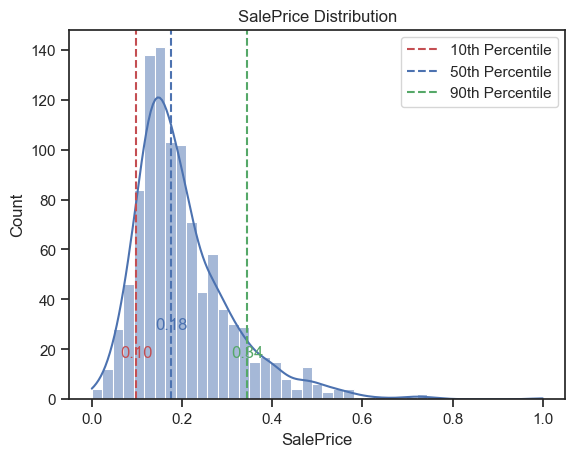

In [970]:
fetch_q_target_plt(train_y, col=None)


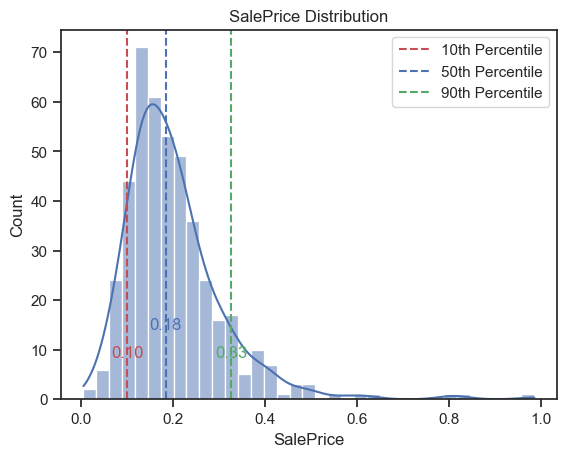

In [972]:
fetch_q_target_plt(test_y, col=None)

### OLS with Selected Feats

In [973]:
import re
col_num_map_ols = lambda df: {col:re.sub(r'\d+','', col) for col in df.columns if re.match(r'\d+', col)}

print(col_num_map_ols(train_x_final))
train_x_final = train_x_final.rename(columns=col_num_map_ols(train_x_final))

{}


In [974]:
train_x_final.head()

,GarageCars,KitchenQual_0,FullBath,Fireplaces,ExterQual_3,TotRmsAbvGrd,BsmtExposure_1,BsmtQual_0,BsmtFinType1_2,MSZoning_4,BsmtQual_3,FireplaceQu_0,WoodDeckSF,Condition1_2,GarageArea,LotConfig_1,Neighborhood_16,Exterior2nd_3,MasVnrArea,CentralAir_0,KitchenQual_3,MasVnrType_2,OverallQual_8,OverallQual_9,Neighborhood_7,GarageYrBlt,BsmtQual_2,PavedDrive_0,SaleCondition_3,GarageFinish_3,Neighborhood_12,Exterior1st_6,RoofStyle_1,YrSold_1,Condition1_4,KitchenQual_1,BsmtExposure_2,Heating_1,Condition1_1,OverallQual_4,HouseStyle_5,HalfBath,MasVnrType_3,CentralAir_1,const
186,0.500,0,0.667,0.000,1,0.333,0,0,1,0,0,0,0.196,1,0.350,1,0,0,0.000,0,0,1,0,0,0,0.855,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0.000,0,1,1.000
691,0.750,1,1.000,0.667,0,0.667,1,1,1,0,0,1,0.446,1,0.587,0,0,0,0.731,0,0,0,0,1,0,0.884,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0.500,0,1,1.000
380,0.250,0,0.667,0.333,1,0.333,0,0,0,0,0,0,0.000,1,0.217,0,0,0,0.000,0,0,1,0,0,0,0.377,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0.000,0,1,1.000
906,0.750,0,0.667,0.333,0,0.500,0,0,1,0,0,0,0.000,1,0.610,0,0,0,0.130,0,0,0,0,0,0,0.971,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0.000,1,1,1.000
984,0.500,0,0.667,0.000,1,0.500,0,0,0,0,1,0,0.000,1,0.380,0,0,0,0.000,0,0,1,0,0,0,0.761,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0.000,0,1,1.000


In [975]:
# train_x_final.drop('const', axis=1, inplace=True)

### Quantile Model for 0.5

In [983]:

train_x_final['SalePrice'] = train_y
mod = smf.quantreg(f"SalePrice ~ {' + '.join([col for col in train_x_final.columns if col not in ['SalePrice', 'const']])}", train_x_final)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              SalePrice   Pseudo R-squared:               0.6152
Model:                       QuantReg   Bandwidth:                     0.01474
Method:                 Least Squares   Sparsity:                      0.06987
Date:                Wed, 29 Mar 2023   No. Observations:                 1022
Time:                        08:49:56   Df Residuals:                      978
                                        Df Model:                           43
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0596      0.009      6.797      0.000       0.042       0.077
GarageCars         -0.0013      0.014     -0.092      0.927      -0.028       0.026
KitchenQual_0       0.0351      0.006      5.785      0.000       0.023       0.047
FullBath            0.0387 

### All Quantile Model

In [984]:
# All Quantile Model
quantiles = np.array([.1, .5, .9])
train_x_final['SalePrice'] = train_y

mod = smf.quantreg(f"SalePrice ~ {' + '.join([col for col in train_x_final.columns if col not in ['SalePrice', 'const']])}", train_x_final)

def fit_model(q):
    res = mod.fit(q=q)
    smf_params_df =  pd.concat([res.params, res.conf_int()], axis=1)
    smf_params_df.columns=['coef', '2.5%', '97.5%']
    smf_params_df['q'] = q
    return smf_params_df, res

models = [fit_model(x) for x in quantiles]
models_res = [x[1] for x in models]
models_df = pd.concat([x[0] for x in models])

In [985]:
models_df

,coef,2.5%,97.5%,q
Intercept,0.024,0.003,0.046,0.100
GarageCars,0.039,0.001,0.076,0.100
KitchenQual_0,0.030,0.016,0.043,0.100
FullBath,0.047,0.019,0.075,0.100
Fireplaces,0.043,0.027,0.059,0.100
...,...,...,...,...
OverallQual_4,-0.009,-0.017,-0.002,0.900
HouseStyle_5,-0.008,-0.018,0.002,0.900
HalfBath,0.018,0.001,0.035,0.900
MasVnrType_3,0.011,-0.001,0.024,0.900


In [993]:
# 0.1 -> lowest r2 as var is low toward 0.1 0.5 -> medium r2 as var is medium toward 0.5 0.9 -> highest r2 as var is high toward 0.9
models_res[2].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              SalePrice   Pseudo R-squared:               0.7153
Model:                       QuantReg   Bandwidth:                     0.01678
Method:                 Least Squares   Sparsity:                       0.1443
Date:                Wed, 29 Mar 2023   No. Observations:                 1022
Time:                        08:56:17   Df Residuals:                      978
                                        Df Model:                           43
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0757      0.013      5.668      0.000       0.050       0.102
GarageCars         -0.0193      0.017     -1.153      0.249      -0.052       0.014
KitchenQual_0       0.0278      0.009      2.930      0.003       0.009       0.046
FullBath            0.0748      0.014      5.411      0.000       0.048       0.102
Fireplaces          0.0557      0.008      6.680      0.000       0.039       0.072
ExterQual_3        -0.0241      0.005     -4.428      0.000      -0.035      -0.013
TotRmsAbvGrd        0.1836      0.014     12.802      0.000       0.155       0.212
BsmtExposure_1      0.0530      0.006      9.621      0.000       0.042       0.064
BsmtQual_0          0.0593      0.008      7.406      0.000       0.044       0.075
BsmtFinType1_2      0.0194      0.004      4.934      0.000       0.012       0.027
MSZoning_4         -0.0369      0.005     -7.704      0.000      -0.046      -0.028
BsmtQual_3         -0.0456      0.010     -4.354      0.000      -0.066      -0.025
FireplaceQu_0       0.0962      0.011      9.038      0.000       0.075       0.117
WoodDeckSF          0.0308      0.012      2.472      0.014       0.006       0.055
Condition1_2        0.0118      0.006      1.872      0.062      -0.001       0.024
GarageArea          0.1783      0.019      9.444      0.000       0.141       0.215
LotConfig_1         0.0238      0.006      4.087      0.000       0.012       0.035
Neighborhood_16    -0.0148      0.009     -1.632      0.103      -0.033       0.003
Exterior2nd_3       0.0951      0.011      8.361      0.000       0.073       0.117
MasVnrArea          0.1732      0.021      8.375      0.000       0.133       0.214
CentralAir_0        0.0225      0.007      3.250      0.001       0.009       0.036
KitchenQual_3      -0.0099      0.005     -2.050      0.041      -0.019      -0.000
MasVnrType_2        0.0180      0.005      3.761      0.000       0.009       0.027
OverallQual_8       0.0705      0.013      5.348      0.000       0.045       0.096
OverallQual_9       0.2254      0.021     10.583      0.000       0.184       0.267
Neighborhood_7     -0.0126      0.007     -1.909      0.057      -0.026       0.000
GarageYrBlt        -0.0596      0.016     -3.700      0.000      -0.091      -0.028
BsmtQual_2          0.0059      0.005      1.188      0.235      -0.004       0.016
PavedDrive_0       -0.0077      0.008     -1.021      0.308      -0.023       0.007
SaleCondition_3    -0.0100      0.012     -0.813      0.416      -0.034       0.014
GarageFinish_3     -0.0125      0.004     -3.279      0.001      -0.020      -0.005
Neighborhood_12    -0.0158      0.005     -3.121      0.002      -0.026      -0.006
Exterior1st_6      -0.0145      0.005     -3.139      0.002      -0.024      -0.005
RoofStyle_1        -0.0121      0.004     -3.159      0.002      -0.020      -0.005
YrSold_1            0.0099      0.004      2.654      0.008       0.003       0.017
Condition1_4       -0.0312      0.019     -1.631      0.103      -0.069       0.006
KitchenQual_1      -0.0179      0.010     -1

### p-value plots for various quantile model

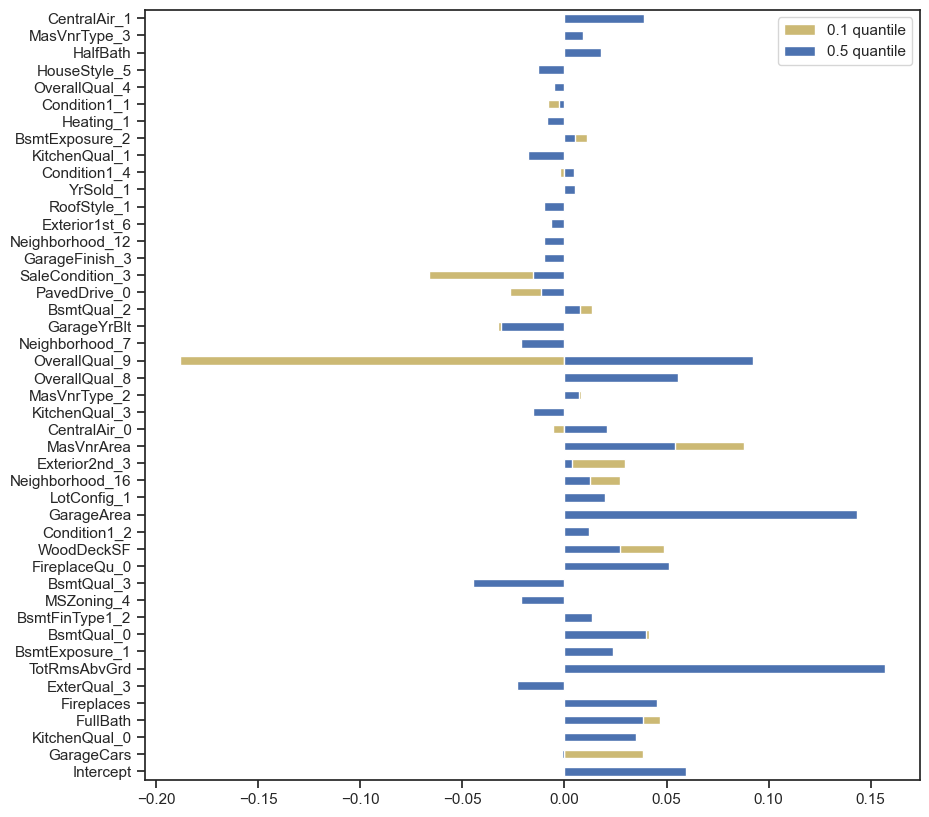

In [994]:
ax_0_1q = models_res[0].params.plot(kind='barh', figsize=(10, 10), color='y')
ax_0_5q = models_res[1].params.plot(kind='barh', figsize=(10, 10), ax=ax_0_1q)
plt.legend(['0.1 quantile', '0.5 quantile'])
plt.show()


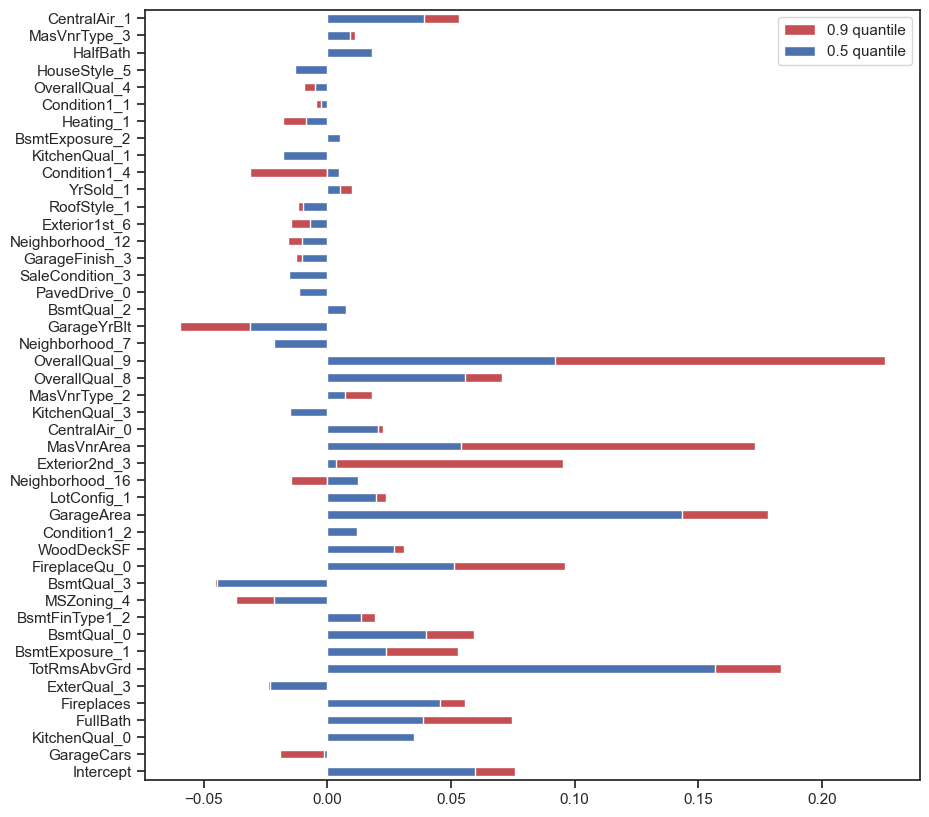

In [996]:
ax_0_9q = models_res[2].params.plot(kind='barh', figsize=(10, 10), color='r')
ax_0_5q = models_res[1].params.plot(kind='barh', figsize=(10, 10), ax=ax_0_9q)
plt.legend(['0.9 quantile', '0.5 quantile'])
plt.show()


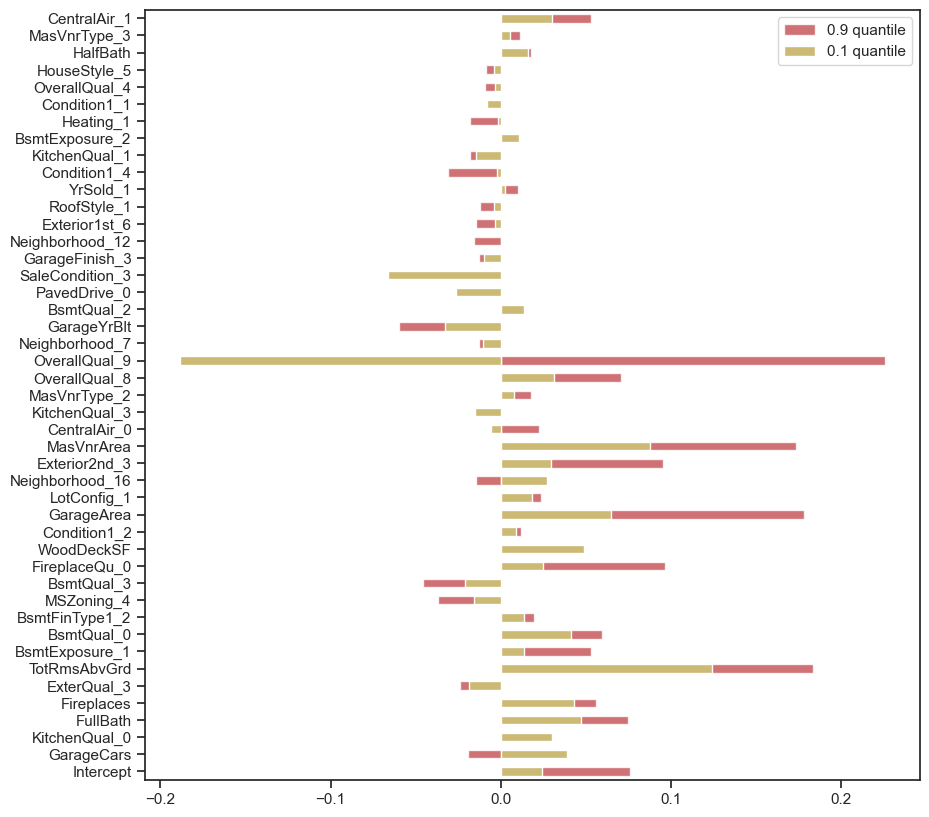

In [1011]:
ax_0_9q = models_res[2].params.plot(kind='barh', figsize=(10, 10), color='r', alpha=0.8)
ax_0_1q = models_res[0].params.plot(kind='barh', figsize=(10, 10), ax=ax_0_9q, color='y')
plt.legend(['0.9 quantile', '0.1 quantile'])
plt.show()

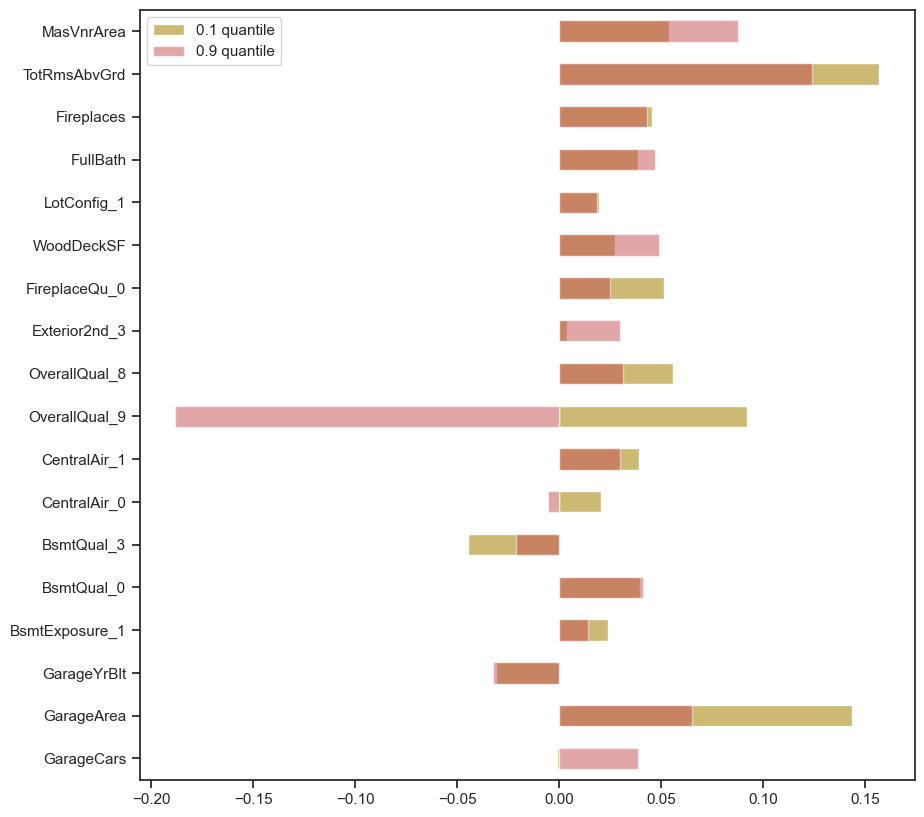

In [1009]:
# "['Neighborhood_5', 'YearBuilt', 'Exterior1st_5'] not in index"
compare_feat = ['GarageCars', 'GarageArea', 'GarageYrBlt',
                'BsmtExposure_1', 'BsmtQual_0','BsmtQual_3', 
                'CentralAir_0',  'CentralAir_1',
                'OverallQual_9', 'OverallQual_8', 'Exterior2nd_3',
                'FireplaceQu_0', 'WoodDeckSF', 'LotConfig_1', 
                'FullBath', 'Fireplaces', 'TotRmsAbvGrd',
                'MasVnrArea'
                ]
ax_0_9q = models_res[1].params[compare_feat].plot(kind='barh', figsize=(10, 10), color='y')
ax_0_1q = models_res[0].params[compare_feat].plot(kind='barh', figsize=(10, 10), ax=ax_0_9q, color='r', alpha=0.5)
plt.legend(['0.1 quantile', '0.9 quantile'])
plt.show()

### OLS Model

In [1019]:

ols = smf.ols(f"SalePrice ~ {' + '.join([col for col in train_x_final.columns if col!='SalePrice'])}", train_x_final).fit()

ols_df =  pd.concat([ols.params, ols.conf_int()], axis=1)

ols_df.columns=['coef', '2.5%', '97.5%']

In [1020]:
ols_df.head()

,coef,2.5%,97.5%
Intercept,0.034,0.020,0.048
GarageCars,0.034,-0.003,0.070
KitchenQual_0,0.038,0.022,0.055
FullBath,0.056,0.031,0.082
Fireplaces,0.044,0.027,0.060


### Prediction - Discussion

In [1021]:
predict_df = pd.DataFrame(columns=["y_true", "0.1", "0.5", "0.9", "ols_pred"])
predict_df['y_true'] = test_y
for idx, quantile_ in enumerate([0.1, 0.5, 0.9]):
    predict_df[f'{quantile_}'] = models_res[idx].predict(test_x_final).values
predict_df["ols_pred"] = ols.predict(test_x_final).values

In [1022]:
predict_df.sort_values(by='y_true', ascending=True)

,y_true,0.1,0.5,0.9,ols_pred
533,0.006,-0.031,0.008,0.030,-0.015
1325,0.028,-0.011,0.051,0.069,0.030
410,0.035,0.061,0.092,0.133,0.082
1432,0.041,0.094,0.130,0.186,0.144
1279,0.047,0.109,0.156,0.192,0.151
...,...,...,...,...,...
1373,0.599,0.196,0.540,0.824,0.547
798,0.625,0.459,0.521,0.655,0.548
898,0.801,0.461,0.551,0.695,0.583
1169,0.819,0.238,0.550,0.902,0.581


In [1040]:
(predict_df['y_true'] > predict_df['0.1']).value_counts(normalize=True)

True    0.879
False   0.121
dtype: float64

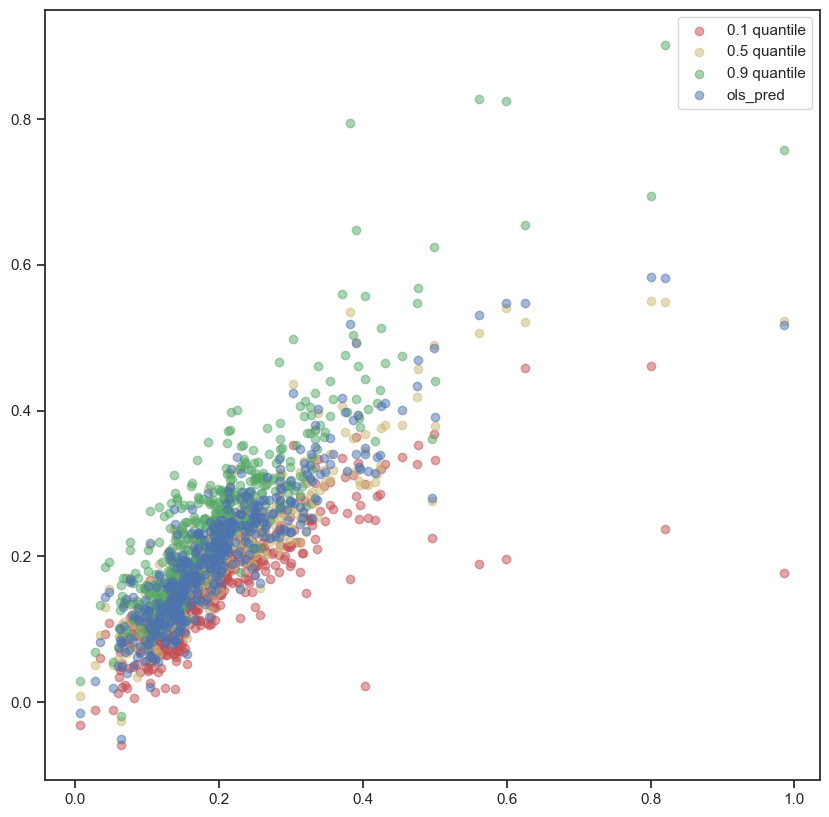

In [1032]:
# scatter plot of predicted vs actual
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(predict_df['y_true'], predict_df['0.1'], color='r', alpha=0.5, label='0.1 quantile')
ax.scatter(predict_df['y_true'], predict_df['0.5'], color='y', alpha=0.5, label='0.5 quantile')
ax.scatter(predict_df['y_true'], predict_df['0.9'], color='g', alpha=0.5, label='0.9 quantile')
ax.scatter(predict_df['y_true'], predict_df['ols_pred'], color='b', alpha=0.5, label='ols_pred')
ax.legend()
plt.show()


In [1033]:
models_df

,coef,2.5%,97.5%,q
Intercept,0.024,0.003,0.046,0.100
GarageCars,0.039,0.001,0.076,0.100
KitchenQual_0,0.030,0.016,0.043,0.100
FullBath,0.047,0.019,0.075,0.100
Fireplaces,0.043,0.027,0.059,0.100
...,...,...,...,...
OverallQual_4,-0.009,-0.017,-0.002,0.900
HouseStyle_5,-0.008,-0.018,0.002,0.900
HalfBath,0.018,0.001,0.035,0.900
MasVnrType_3,0.011,-0.001,0.024,0.900


In [1035]:
models_df.loc['FullBath'] 

,coef,2.5%,97.5%,q
FullBath,0.047,0.019,0.075,0.100
FullBath,0.039,0.020,0.057,0.500
FullBath,0.075,0.048,0.102,0.900


In [1036]:
ols_df.loc['FullBath']

coef    0.056
2.5%    0.031
97.5%   0.082
Name: FullBath, dtype: float64

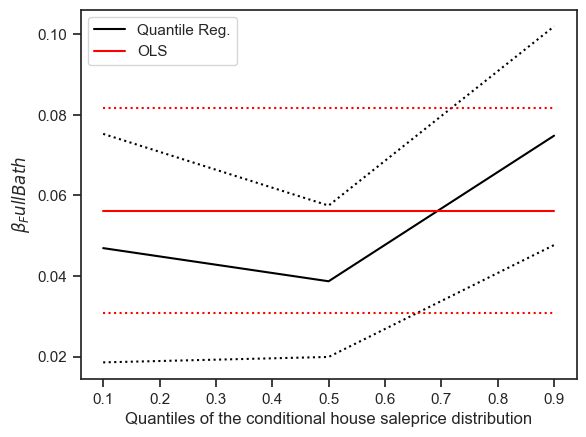

In [1038]:
all_quants = [0.1, 0.5, 0.9]
n = len(all_quants)
col = 'FullBath'
col_df = models_df.loc[col]
p1 = plt.plot(col_df.q, col_df['coef'], color="black", label="Quantile Reg.")
p2 = plt.plot(col_df.q, col_df['2.5%'], linestyle="dotted", color="black")
p3 = plt.plot(col_df.q, col_df['97.5%'], linestyle="dotted", color="black")

p4 = plt.plot(col_df.q, [ols_df.loc[col]["coef"]] * n, color="red", label="OLS")

p5 = plt.plot(col_df.q, [ols_df.loc[col]["2.5%"]] * n, linestyle="dotted", color="red")
p6 = plt.plot(col_df.q, [ols_df.loc[col]["97.5%"]] * n, linestyle="dotted", color="red")
plt.ylabel(r"$\beta_{}$".format(col))
plt.xlabel("Quantiles of the conditional house saleprice distribution")
plt.legend()
plt.show()

In [1024]:
ols_avg_margin = (predict_df['0.9'] - predict_df['0.1']).sum()/(2*len(predict_df))
ols_avg_margin

0.04810416554746646

In [1025]:
predict_df['y_true_in_q'] = predict_df.apply(lambda x: 1 if x['y_true'] >= x['0.1'] and x['y_true'] <= x['0.9'] else 0, axis=1)

In [1026]:
predict_df['y_true_in_q'].sum()/predict_df['y_true_in_q'].shape[0]

0.7488584474885844

In [1028]:
for ols_avg_margin in np.arange(0.01, 0.5, 0.005):
    predict_df['y_true_in_ols'] = predict_df.apply(lambda x: 1 if x['y_true'] >= x['ols_pred'] - ols_avg_margin and x['y_true'] <= x['ols_pred'] + ols_avg_margin else 0, axis=1)
    print(round(ols_avg_margin, 3), predict_df['y_true_in_ols'].sum()/predict_df['y_true_in_ols'].shape[0])

0.01 0.2420091324200913
0.015 0.3105022831050228
0.02 0.4178082191780822
0.025 0.5114155251141552
0.03 0.6004566210045662
0.035 0.6506849315068494
0.04 0.6986301369863014
0.045 0.7579908675799086
0.05 0.7968036529680366
0.055 0.8356164383561644
0.06 0.863013698630137
0.065 0.8926940639269406
0.07 0.906392694063927
0.075 0.9155251141552512
0.08 0.9292237442922374
0.085 0.9406392694063926
0.09 0.9497716894977168
0.095 0.95662100456621
0.1 0.95662100456621
0.105 0.9726027397260274
0.11 0.9771689497716894
0.115 0.9840182648401826
0.12 0.9840182648401826
0.125 0.9863013698630136
0.13 0.9885844748858448
0.135 0.9885844748858448
0.14 0.9908675799086758
0.145 0.9908675799086758
0.15 0.9908675799086758
0.155 0.9908675799086758
0.16 0.9908675799086758
0.165 0.9908675799086758
0.17 0.9908675799086758
0.175 0.9908675799086758
0.18 0.9908675799086758
0.185 0.9908675799086758
0.19 0.9908675799086758
0.195 0.9908675799086758
0.2 0.9908675799086758
0.205 0.9908675799086758
0.21 0.9908675799086758
0.21

In [839]:
ols_avg_margin

0.046762264579974545

In [838]:
predict_df['y_true_in_ols'].sum()/predict_df['y_true_in_ols'].shape[0]

0.7534246575342466

In [730]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     108.3
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:35:25   Log-Likelihood:                 1723.3
No. Observations:                1022   AIC:                            -3355.
Df Residuals:                     976   BIC:                            -3128.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.143e+10   1.53e+10     -3.368      0.001   -8.14e+10   -2.15e+10
GarageCars          0.0605      0.018      3.337      0.001       0.025       0.096
BsmtQual_0          0.0536      0.009      5.850      0.000       0.036       0.072
TotRmsAbvGrd        0.1512      0.016      9.398      0.000       0.120       0.183
ExterQual_3        -0.0164      0.010     -1.715      0.087      -0.035       0.002
Fireplaces          0.0493      0.008      6.162      0.000       0.034       0.065
BsmtFinType1_2      0.0192      0.004      4.828      0.000       0.011       0.027
OverallQual_9       0.1087      0.017      6.314      0.000       0.075       0.142
OverallQual_8       0.0737      0.012      6.371      0.000       0.051       0.096
BsmtExposure_1      0.0329      0.005      6.014      0.000       0.022       0.044
MSZoning_4         -0.0231      0.005     -4.608      0.000      -0.033      -0.013
FullBath            0.0632      0.012      5.135      0.000       0.039       0.087
BsmtQual_3         -0.0334      0.009     -3.549      0.000      -0.052      -0.015
MasVnrArea          0.1053      0.019      5.488      0.000       0.068       0.143
Condition1_2        0.0158      0.005      2.884      0.004       0.005       0.027
KitchenQual_3      -0.0195      0.004     -4.486      0.000      -0.028      -0.011
LotConfig_1         0.0250      0.006      4.023      0.000       0.013       0.037
Exterior2nd_3       0.0291      0.011      2.653      0.008       0.008       0.051
Exterior1st_5       0.0190      0.008      2.432      0.015       0.004       0.034
Neighborhood_7     -0.0276      0.007     -4.207      0.000      -0.040      -0.015
KitchenQual_1      -0.0266      0.010     -2.731      0.006      -0.046      -0.007
MasVnrType_2        0.0158      0.005      3.451      0.001       0.007       0.025
WoodDeckSF          0.0269      0.011      2.550      0.011       0.006       0.048
KitchenQual_0       0.0199      0.008      2.465      0.014       0.004       0.036
CentralAir_0     4.762e+11   1.41e+11      3.368      0.001    1.99e+11    7.54e+11
Heating_1          -0.0253      0.011     -2.276      0.023      -0.047      -0.003
BsmtExposure_2      0.0110      0.006      1.962      0.050   -5.89e-07       0.022
RoofStyle_1        -0.0101      0.004     -2.631      0.009      -0.018      -0.003
FireplaceQu_0       0.0278      0.012      2.336      0.020       0.004       0.051
Neighborhood_16     0.0150      0.008      1.843      0.066      -0.001       0.031
Neighborhood_12    -0.0110      0.005     -2.275      0.023      -0.021      -0.002
GarageFinish_3     -0.0065      0.004     -1.574      0.116      -0.015       0.002
MasVnrType_3        0.0126      0.006      2.070      0.039       0.001       0.025
ExterQual_2         0.0112      0.009      1.185      0.236

In [742]:
ols_df.head(10)

,coef,2.5%,97.5%
Intercept,-51427484011.183,-81394274200.220,-21460693822.145
GarageCars,0.061,0.025,0.096
BsmtQual_0,0.054,0.036,0.072
TotRmsAbvGrd,0.151,0.120,0.183
ExterQual_3,-0.016,-0.035,0.002
Fireplaces,0.049,0.034,0.065
BsmtFinType1_2,0.019,0.011,0.027
OverallQual_9,0.109,0.075,0.142
OverallQual_8,0.074,0.051,0.096
BsmtExposure_1,0.033,0.022,0.044


In [ ]:
['TotRmsAbvGrd', 'Fireplaces']

Text(0, 0.5, 'SalePrice')

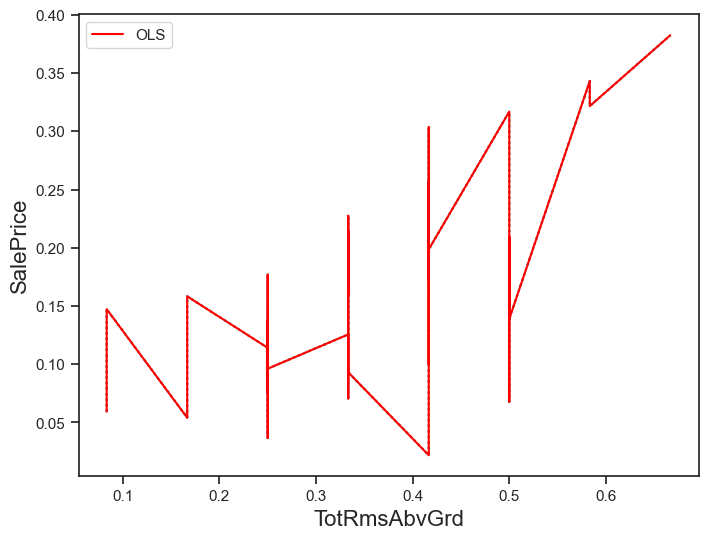

In [1029]:
plot_col = "TotRmsAbvGrd"
train_x_final_vw = train_x_final.sample(n=50, random_state=42)
train_x_final_vw = train_x_final_vw.sort_values(by=plot_col)
x = train_x_final_vw[plot_col].values
get_y = lambda coeff, df: df[coeff.index[1:]].dot(coeff[1:]) + coeff[0]

fig, ax = plt.subplots(figsize=(8, 6))

for quantile_ in [0.1, 0.5, 0.9]:
    model_coeff = models_df.groupby('q').get_group(quantile_)['coef']
    y_quant = get_y(model_coeff, train_x_final_vw)
    ax.plot(x, y_quant, linestyle="dotted", color="grey")

ols_coeff = ols_df['coef']
y_ols = get_y(ols_coeff, train_x_final_vw)

ax.plot(x, y, color="red", label="OLS")
# ax.scatter(data.income, data.foodexp, alpha=0.2)
# ax.set_xlim((240, 3000))
# ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel("TotRmsAbvGrd", fontsize=16)
ax.set_ylabel("SalePrice", fontsize=16)

#### StatsModel QuantRegression

In [123]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.regression.quantile_regression import QuantReg


In [124]:
# ! pip install statsmodels

In [662]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:              SalePrice   Pseudo R-squared:               0.6239
Model:                       QuantReg   Bandwidth:                     0.01431
Method:                 Least Squares   Sparsity:                      0.06386
Date:                Mon, 27 Mar 2023   No. Observations:                 1022
Time:                        23:42:11   Df Residuals:                      976
                                        Df Model:                           45
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0230      0.006      4.041      0.000       0.012       0.034
GarageCars          0.0089      0.013      0.708      0.479      -0.016       0.034
BsmtQual_0          0.0469      0.006      7.349      0.000       0.034       0.059
TotRmsAbvGrd        0.1456      0.011     13.000      0.000       0.124       0.168
ExterQual_3         0.0157      0.007      2.373      0.018       0.003       0.029
Fireplaces          0.0526      0.006      9.456      0.000       0.042       0.064
BsmtFinType1_2      0.0149      0.003      5.407      0.000       0.010       0.020
OverallQual_9       0.1591      0.012     13.793      0.000       0.136       0.182
OverallQual_8       0.0921      0.008     11.465      0.000       0.076       0.108
BsmtExposure_1      0.0271      0.004      7.106      0.000       0.020       0.035
MSZoning_4         -0.0194      0.003     -5.553      0.000      -0.026      -0.013
FullBath            0.0420      0.009      4.905      0.000       0.025       0.059
BsmtQual_3         -0.0409      0.007     -6.234      0.000      -0.054      -0.028
MasVnrArea          0.0731      0.013      5.592      0.000       0.047       0.099
Condition1_2        0.0147      0.004      3.839      0.000       0.007       0.022
KitchenQual_3      -0.0179      0.003     -5.920      0.000      -0.024      -0.012
LotConfig_1         0.0219      0.004      5.086      0.000       0.013       0.030
Exterior2nd_3       0.0036      0.008      0.475      0.635      -0.011       0.019
Exterior1st_5       0.0112      0.005      2.051      0.040       0.000       0.022
Neighborhood_7     -0.0256      0.005     -5.598      0.000      -0.035      -0.017
KitchenQual_1      -0.0172      0.007     -2.536      0.011      -0.031      -0.004
MasVnrType_2        0.0112      0.003      3.538      0.000       0.005       0.017
WoodDeckSF          0.0140      0.007      1.904      0.057      -0.000       0.028
KitchenQual_0       0.0272      0.006      4.869      0.000       0.016       0.038
CentralAir_0        0.0044      0.004      1.251      0.211      -0.003       0.011
Heating_1          -0.0182      0.008     -2.348      0.019      -0.033      -0.003
BsmtExposure_2      0.0073      0.004      1.872      0.062      -0.000       0.015
RoofStyle_1        -0.0121      0.003     -4.554      0.000      -0.017      -0.007
FireplaceQu_0       0.0249      0.008      3.023      0.003       0.009       0.041
Neighborhood_16     0.0125      0.006      2.207      0.028       0.001       0.024
Neighborhood_12    -0.0089      0.003     -2.636      0.009      -0.016      -0.002
GarageFinish_3     -0.0070      0.003     -2.452      0.014      -0.013      -0.001
MasVnrType_3        0.0089      0.004      2.109      0.035       0.001       0.017
ExterQual_2         0.0399      0.006      6.158      0.000       0.027       0.053
GarageYrBlt        -0.0175      0.012     -1.515      0.130      -0.040       0.005
PavedDrive_0       -0.0088      0.005     -1.843      0.066      -0.018       0.001
HalfBath            0.0197      0.006      3

In [173]:
quantile_df = res.params

In [175]:
quantile_df.index

Index(['Intercept', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'MoSold_2', 'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7',
       'MoSold_8', 'MoSold_9', 'MoSold_10', 'MoSold_11'],
      dtype='object', length=374)

In [174]:
quantile_df[['0.1_quantile', '0.5_quantile', '0.9_quantile']] =     [res.conf_int().loc[feat].tolist() for feat in quantile_df.index]

Intercept      -0.037
LotFrontage    -0.012
LotArea         0.235
YearBuilt       0.081
YearRemodAdd    0.008
                ...  
MoSold_7        0.000
MoSold_8       -0.000
MoSold_9       -0.000
MoSold_10      -0.003
MoSold_11      -0.004
Length: 374, dtype: float64

In [171]:

for feat in res.params.index:
    


Index(['Intercept', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'MoSold_2', 'MoSold_3', 'MoSold_4', 'MoSold_5', 'MoSold_6', 'MoSold_7',
       'MoSold_8', 'MoSold_9', 'MoSold_10', 'MoSold_11'],
      dtype='object', length=374)

In [ ]:
# May be remove the multicollinearity and covnerge this

### Quantile Regression

In [119]:
quantiles = np.array([.1, .5, .9])

def fit_model(q):
    res = mod.fit(q=q)
    return [[] for col in ]+ [q]
    return [res.params['Intercept'], res.params['income']] + res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns = ['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols(f"SalePrice ~ {' + '.join(train_feat)}", train_df).fit()


ols_ci = ols.conf_int().loc['income'].tolist()
ols = dict(a = ols.params['Intercept'], 
          b = ols.params['income'],
          lb = ols_ci[0], 
          ub = ols_ci[1])
print(models)
print(ols)

(1022,)